In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as pyplot
from scipy.spatial.distance import cdist
import numpy as np

In [2]:
#Загрузите данные ex6data1.mat из файла.

data = loadmat('ex6data1.mat')

x = data['X']
print(x.shape)

(50, 2)


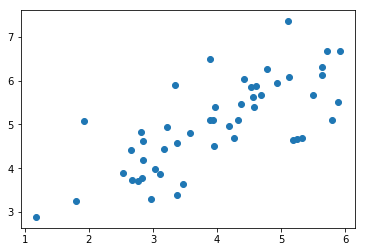

In [3]:
pyplot.scatter(x[:, 0], x[:, 1])
pyplot.show()

In [4]:
#Реализуйте функцию случайной инициализации K центров кластеров.

def initialize(k=3, n=2, low=3, hight=4):
    return np.random.uniform(low=low, high=hight, size=(k,n))

centroids = initialize()
print(centroids)

[[ 3.55003235  3.22926331]
 [ 3.88541289  3.58710695]
 [ 3.06026973  3.88262913]]


In [5]:
#Реализуйте функцию определения принадлежности к кластерам.

def clusterMemberships(x, centroids):
    distances = cdist(x, centroids)
    memberships = distances.argmin(axis=1)
    return memberships

memberships = clusterMemberships(x, centroids)
print(memberships)

[0 1 2 2 2 2 0 1 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 2 2 2 1 2 1 2 1 2
 1 2 1 1 2 2 1 2 2 2 2 1 1]


In [6]:
#Реализуйте функцию пересчета центров кластеров.

def recalculateCenters(x, centroids, memberships, k=3):
    centroids = centroids.copy()
    for index in range(k):
        centroids[index, :] = np.mean(x[memberships == index, :], axis=0, dtype=np.float32)
        
    return centroids

centroids = recalculateCenters(x, centroids, memberships)
print(centroids)

[[ 3.428684    3.51098061]
 [ 4.96975231  5.63670158]
 [ 2.97226548  4.44351149]]


In [16]:
#Реализуйте алгоритм K-средних.

def kMeans(x, centroids, k, n=2):
    centroidsHistory = []
    centroidsHistory.append(centroids)
    
    iterations = 3
    
    for i in range(iterations):
        memberships = clusterMemberships(x, centroids)
        centroids = recalculateCenters(x, centroids, memberships, k)
        centroidsHistory.append(centroids)

    return centroidsHistory

centroids = initialize(3, 2)
centroidsHistory = kMeans(x, centroids, 3)
print(centroidsHistory)

[array([[ 3.27379535,  3.99451372],
       [ 3.6357779 ,  3.40985963],
       [ 3.49329382,  3.93325016]]), array([[ 2.82151723,  4.38389301],
       [ 3.27371883,  3.44073653],
       [ 4.8583312 ,  5.59014511]]), array([[ 2.9976747 ,  4.51834869],
       [ 2.68658066,  3.50221658],
       [ 4.80385923,  5.66897011]]), array([[ 3.12828016,  4.71762085],
       [ 2.67157435,  3.5404439 ],
       [ 4.89184761,  5.6817317 ]])]


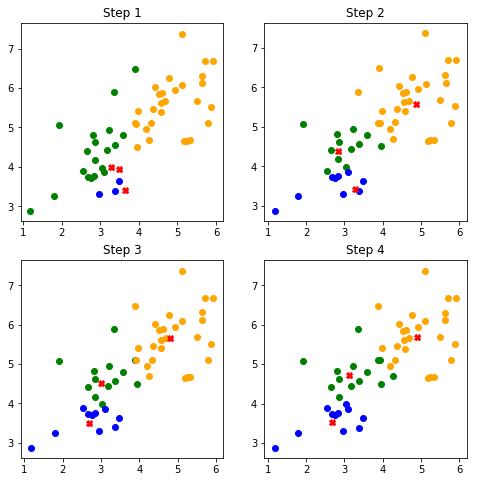

In [17]:
#Постройте график, на котором данные разделены на K=3 кластеров (при помощи различных маркеров или цветов), 
#а также траекторию движения центров кластеров в процессе работы алгоритма

def plotCentroidsHistory(centroidsHistory, k=3):
    pyplot.figure(figsize=(8, 8))
    for i in range(len(centroidsHistory)):
        memberships = clusterMemberships(x, centroidsHistory[i])
        pyplot.subplot(2, 2, i + 1)
        colors = ["green", "blue", "orange"]
        for kIndex, color in zip(range(k), colors):
            pyplot.scatter(x[memberships == kIndex, 0], x[memberships == kIndex, 1], c=color)
        pyplot.plot(centroidsHistory[i][:, 0], centroidsHistory[i][:, 1], 'rX')
        pyplot.title('Step {:}'.format(i + 1));

    pyplot.show()
    
plotCentroidsHistory(centroidsHistory)

In [9]:
#Загрузите данные bird_small.mat из файла.

birdData = loadmat('bird_small.mat')

aOriginal = birdData['A']
print(aOriginal.shape)

(128, 128, 3)


In [10]:
#С помощью алгоритма K-средних используйте 16 цветов для кодирования пикселей.

def distance(x1, y1, x2, y2): 
    dist = np.square(x1 - x2) + np.square(y1 - y2) 
    dist = np.sqrt(dist) 
    return dist

def kMeansFor(image, clusters): 
    iterations = 10
    points = np.reshape(image, (image.shape[0] * image.shape[1], image.shape[2])) 
    m, n = points.shape 
    index = np.zeros(m)  
    
    means = initialize(k=clusters, n=image.shape[2], low=0, hight=1)
 
    while(iterations > 0): 
        for j in range(len(points)): 
            minv = 1000
            temp = None
              
            for k in range(clusters): 
                x1 = points[j, 0] 
                y1 = points[j, 1] 
                x2 = means[k, 0] 
                y2 = means[k, 1] 
                
                if(distance(x1, y1, x2, y2) < minv):          
                    minv = distance(x1, y1, x2, y2) 
                    temp = k 
                    index[j] = k  
          
        for k in range(clusters): 
            sumx = 0
            sumy = 0
            count = 0
              
            for j in range(len(points)): 
                if(index[j] == k): 
                    sumx += points[j, 0] 
                    sumy += points[j, 1]  
                    count += 1
              
            if(count == 0): 
                count = 1    
              
            means[k, 0] = float(sumx / count) 
            means[k, 1] = float(sumy / count)      
              
        iterations -= 1
  
    return means, index

In [11]:
#Насколько уменьшился размер изображения? Как это сказалось на качестве?

def compress_image(means, index, size): 
    centroid = np.array(means) 
    recovered = centroid[index.astype(int), :] 
    recovered = np.reshape(recovered, (128, 128, 3)) 
    pyplot.imshow(recovered) 
    pyplot.show()

k = 16
image = aOriginal / 255.
means, index = kMeansFor(image, k)

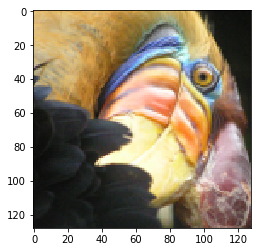

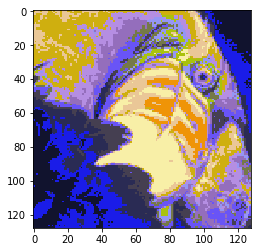

In [12]:
pyplot.imshow(aOriginal)
pyplot.show()

compress_image(means, index, image)

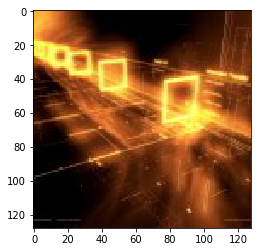

(128, 128, 3)


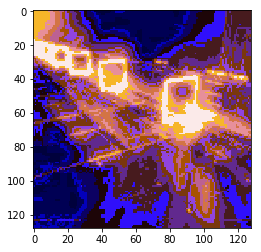

In [13]:
#Реализуйте алгоритм K-средних на другом изображении.

from scipy import misc
testImage = misc.imread('testImage.jpg') 
pyplot.imshow(testImage)
pyplot.show()

testImage = testImage / 255.
print(testImage.shape)

means, index = kMeansFor(testImage, k)
compress_image(means, index, testImage)

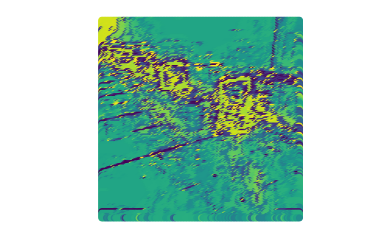

In [14]:
#Реализуйте алгоритм иерархической кластеризации на том же изображении. Сравните полученные результаты.

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster

points = np.reshape(testImage, (testImage.shape[0] * testImage.shape[1], testImage.shape[2]))

distance_mat = pdist(points) 

Z = hierarchy.linkage(distance_mat, 'single')
max_d = .1
while max_d > 0.005:
    max_d *= .5
    clusters = fcluster(Z, max_d, criterion='distance')
    meshx, meshy = np.meshgrid(np.arange(128), np.arange(128))
    
pyplot.axis('equal')
pyplot.axis('off')
pyplot.scatter(meshx, -(meshy - 128), c=clusters.reshape(128, 128))
pyplot.show()

In [15]:
#Ответы на вопросы представьте в виде отчета.